# Loading initial packages: 

In [38]:
pip install seaborn


     -------------------------------------- 288.2/288.2 kB 9.0 MB/s eta 0:00:00


In [10]:
## helpful packages

# Administrative stuff:
import os

# For Data manipulation:
import pandas as pd
import numpy as np
import random
import re

# Nice to haves
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
# import googlemaps
import plotly.graph_objects as go

## dynamic text updating
from IPython.display import Markdown as md

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# STARTING STUFF: TRACT Data - Local Data for Better Health
This dataset contains model-based census tract-level estimates for the PLACES 2021 release. 

PLACES is the expansion of the original 500 Cities project and covers the entire United States—50 states and the District of Columbia (DC)—at county, place, census tract, and ZIP Code Tabulation Area (ZCTA) levels. It represents a first-of-its kind effort to release information uniformly on this large scale for local areas at 4 geographic levels. Estimates were provided by the Centers for Disease Control and Prevention (CDC), Division of Population Health, Epidemiology and Surveillance Branch. PLACES was funded by the Robert Wood Johnson Foundation (RWJF) in conjunction with the CDC Foundation. The dataset includes estimates for 29 measures: 4 chronic disease-related health risk behaviors, 13 health outcomes, 3 health status, and 9 on use of preventive services. These estimates can be used to identify emerging health problems and to help develop and carry out effective, targeted public health prevention activities. Because the small area model cannot detect effects due to local interventions, users are cautioned against using these estimates for program or policy evaluations. Data sources used to generate these model-based estimates include Behavioral Risk Factor Surveillance System (BRFSS) 2019 or 2018 data, Census Bureau 2010 population data, and American Community Survey (ACS) 2015–019 or 2014–2018 estimates. The 2021 release uses 2019 BRFSS data for 22 measures and 2018 BRFSS data for 7 measures (all teeth lost, dental visits, mammograms, cervical cancer screening, colorectal cancer screening, core preventive services among older adults, and sleeping less than 7 hours a night). Seven measures are based on the 2018 BRFSS because the relevant questions are only asked every other year in the BRFSS. More information about the methodology can be found at www.cdc.gov/places.
Expand.


Link: https://chronicdata.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-Census-Tract-D/cwsq-ngmh

In [9]:
# Loading initial data:
tract = pd.read_csv("PLACES__Local_Data_for_Better_Health__Census_Tract_Data_2021_release.csv")
# pd.unique(tract["StateDesc"])

tract_kt = tract[tract["StateDesc"] == "Kentucky"]
tract_kt.info()
tract_kt.head(n=5)
print(tract_kt.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33170 entries, 3596 to 857829
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        33170 non-null  int64  
 1   StateAbbr                   33170 non-null  object 
 2   StateDesc                   33170 non-null  object 
 3   CountyName                  33170 non-null  object 
 4   CountyFIPS                  33170 non-null  int64  
 5   LocationName                33170 non-null  int64  
 6   DataSource                  33170 non-null  object 
 7   Category                    33170 non-null  object 
 8   Measure                     33170 non-null  object 
 9   Data_Value_Unit             33170 non-null  object 
 10  Data_Value_Type             33170 non-null  object 
 11  Data_Value                  33170 non-null  float64
 12  Data_Value_Footnote_Symbol  0 non-null      float64
 13  Data_Value_Footnote        

Year StateAbbr StateDesc CountyName  CountyFIPS  LocationName  \
3596  2019        KY  Kentucky      Adair       21001   21001970300   
3597  2019        KY  Kentucky      Adair       21001   21001970402   
3598  2019        KY  Kentucky   Anderson       21005   21005950201   
3599  2019        KY  Kentucky       Bell       21013   21013960200   
3600  2019        KY  Kentucky       Bell       21013   21013960300   

     DataSource               Category  \
3596      BRFSS  Health Risk Behaviors   
3597      BRFSS        Health Outcomes   
3598      BRFSS        Health Outcomes   
3599      BRFSS        Health Outcomes   
3600      BRFSS        Health Outcomes   

                                                Measure Data_Value_Unit  ...  \
3596  No leisure-time physical activity among adults...               %  ...   
3597                Stroke among adults aged >=18 years               %  ...   
3598            Depression among adults aged >=18 years               %  ...   
3599                Stroke among adults aged >=18 years               %  ...   
3600                Stroke among adults aged >=18 years               %  ...   

     Data_Value_Footnote  Low_Confidence_Limit  High_Confidence_Limit  \
3596                 NaN                  41.5                   48.3   
3597                 NaN                   3.0                    3.6   
3598                 NaN                  25.5                   27.9   
3599                 NaN                   5.4                    6.4   
3600                 NaN                   5.0                    6.2   

      TotalPopulation                       Geolocation   LocationID  \
3596            3,016  POINT (-85.15821669 37.13121962)  21001970300   
3597            4,261  POINT (-85.26802881 37.12055109)  21001970402   
3598            5,372  POINT (-84.92306901 38.02049683)  21005950201   
3599            5,150  POINT (-83.73909778 36.76433928)  21013960200   
3600            2,381  POINT (-83.61861461 36.71356868)  21013960300   

     CategoryID   MeasureId  DataValueTypeID  Short_Question_Text  
3596    RISKBEH         LPA           CrdPrv  Physical Inactivity  
3597    HLTHOUT      STROKE           CrdPrv               Stroke  
3598    HLTHOUT  DEPRESSION           CrdPrv           Depression  
3599    HLTHOUT      STROKE           CrdPrv               Stroke  
3600    HLTHOUT      STROKE           CrdPrv               Stroke  

[5 rows x 23 columns]

(33170, 23)


# Column Analysis

In [10]:
## DataSource
len(pd.unique(tract_kt.DataSource))
pd.unique(tract_kt.DataSource)
# Only one data source: Behavioral Risk Factor Surveillance System (BRFSS)

1

array(['BRFSS'], dtype=object)

In [11]:
## Category
len(pd.unique(tract_kt.Category))
pd.unique(tract_kt.Category)
# Only 4 topics -> Do we reshape data based on this?

4

array(['Health Risk Behaviors', 'Health Outcomes', 'Prevention',
       'Health Status'], dtype=object)

In [20]:
## Measure
# len(pd.unique(tract_kt.Measure))
# pd.unique(tract_kt.Measure)
# 30 measures 
tract_kt.groupby(["Category", "Measure"]).agg('count').reset_index()

Category                                            Measure  \
0         Health Outcomes        All teeth lost among adults aged >=65 years   
1         Health Outcomes             Arthritis among adults aged >=18 years   
2         Health Outcomes  Cancer (excluding skin cancer) among adults ag...   
3         Health Outcomes  Chronic kidney disease among adults aged >=18 ...   
4         Health Outcomes  Chronic obstructive pulmonary disease among ad...   
5         Health Outcomes  Coronary heart disease among adults aged >=18 ...   
6         Health Outcomes        Current asthma among adults aged >=18 years   
7         Health Outcomes            Depression among adults aged >=18 years   
8         Health Outcomes    Diagnosed diabetes among adults aged >=18 years   
9         Health Outcomes   High blood pressure among adults aged >=18 years   
10        Health Outcomes  High cholesterol among adults aged >=18 years ...   
11        Health Outcomes               Obesity among adults aged >=18 years   
12        Health Outcomes                Stroke among adults aged >=18 years   
13  Health Risk Behaviors        Binge drinking among adults aged >=18 years   
14  Health Risk Behaviors       Current smoking among adults aged >=18 years   
15  Health Risk Behaviors  No leisure-time physical activity among adults...   
16  Health Risk Behaviors  Sleeping less than 7 hours among adults aged >...   
17          Health Status  Fair or poor self-rated health status among ad...   
18          Health Status  Mental health not good for >=14 days among adu...   
19          Health Status  Physical health not good for >=14 days among a...   
20             Prevention  Cervical cancer screening among adult women ag...   
21             Prevention  Cholesterol screening among adults aged >=18 y...   
22             Prevention  Current lack of health insurance among adults ...   
23             Prevention  Fecal occult blood test, sigmoidoscopy, or col...   
24             Prevention       Mammography use among women aged 50-74 years   
25             Prevention  Older adult men aged >=65 years who are up to ...   
26             Prevention  Older adult women aged >=65 years who are up t...   
27             Prevention  Taking medicine for high blood pressure contro...   
28             Prevention  Visits to dentist or dental clinic among adult...   
29             Prevention  Visits to doctor for routine checkup within th...   

    Year  StateAbbr  StateDesc  CountyName  CountyFIPS  LocationName  \
0   1105       1105       1105        1105        1105          1105   
1   1106       1106       1106        1106        1106          1106   
2   1106       1106       1106        1106        1106          1106   
3   1106       1106       1106        1106        1106          1106   
4   1106       1106       1106        1106        1106          1106   
5   1106       1106       1106        1106        1106          1106   
6   1106       1106       1106        1106        1106          1106   
7   1106       1106       1106        1106        1106          1106   
8   1106       1106       1106        1106        1106          1106   
9   1106       1106       1106        1106        1106          1106   
10  1106       1106       1106        1106        1106          1106   
11  1106       1106       1106        1106        1106          1106   
12  1106       1106       1106        1106        1106          1106   
13  1106       1106       1106        1106        1106          1106   
14  1106       1106       1106        1106        1106          1106   
15  1106       1106       1106        1106        1106          1106   
16  1106       1106       1106        1106        1106          1106   
17  1106       1106       1106        1106        1106          1106   
18  1106       1106       1106        1106        1106          1106   
19  1106       1106       1106        1106        1106          1106   
20  1106       1106     

# Air Pollution Data
Link: https://aqs.epa.gov/aqsweb/airdata/download_files.html

In [27]:
# Unzipping and getting shape files
filename = os.getcwd() + "\\daily_aqi_by_county_2021.zip"
extract_dir = os.getcwd() + "\\AirQ_Unzipped"

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
import shutil
shutil.unpack_archive(filename, extract_dir)

In [28]:
airq_0 = pd.read_csv("AirQ_Unzipped\\daily_aqi_by_county_2021.csv")

In [29]:
airq_0.info()
airq_0.head(n=10)
airq_0.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323394 entries, 0 to 323393
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 323394 non-null  object
 1   county Name                323394 non-null  object
 2   State Code                 323394 non-null  int64 
 3   County Code                323394 non-null  int64 
 4   Date                       323394 non-null  object
 5   AQI                        323394 non-null  int64 
 6   Category                   323394 non-null  object
 7   Defining Parameter         323394 non-null  object
 8   Defining Site              323394 non-null  object
 9   Number of Sites Reporting  323394 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.7+ MB


State Name county Name  State Code  County Code        Date  AQI  Category  \
0    Alabama     Baldwin           1            3  2021-01-01   27      Good   
1    Alabama     Baldwin           1            3  2021-01-07   24      Good   
2    Alabama     Baldwin           1            3  2021-01-13   46      Good   
3    Alabama     Baldwin           1            3  2021-01-16   21      Good   
4    Alabama     Baldwin           1            3  2021-01-19   52  Moderate   
5    Alabama     Baldwin           1            3  2021-01-22   11      Good   
6    Alabama     Baldwin           1            3  2021-01-25   39      Good   
7    Alabama     Baldwin           1            3  2021-01-28   22      Good   
8    Alabama     Baldwin           1            3  2021-01-31   34      Good   
9    Alabama     Baldwin           1            3  2021-02-03   35      Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  
5              PM2.5   01-003-0010                          1  
6              PM2.5   01-003-0010                          1  
7              PM2.5   01-003-0010                          1  
8              PM2.5   01-003-0010                          1  
9              PM2.5   01-003-0010                          1

(323394, 10)

In [30]:
airq_kt = airq_0[airq_0["State Name"] == "Kentucky"]
airq_kt.head(n=10)
airq_kt.shape

State Name county Name  State Code  County Code        Date  AQI  \
102990   Kentucky        Bell          21           13  2021-01-01   21   
102991   Kentucky        Bell          21           13  2021-01-02   30   
102992   Kentucky        Bell          21           13  2021-01-03   15   
102993   Kentucky        Bell          21           13  2021-01-04   40   
102994   Kentucky        Bell          21           13  2021-01-05   55   
102995   Kentucky        Bell          21           13  2021-01-06   24   
102996   Kentucky        Bell          21           13  2021-01-07   30   
102997   Kentucky        Bell          21           13  2021-01-08   33   
102998   Kentucky        Bell          21           13  2021-01-09   46   
102999   Kentucky        Bell          21           13  2021-01-10   44   

        Category Defining Parameter Defining Site  Number of Sites Reporting  
102990      Good              PM2.5   21-013-0002                          1  
102991      Good              PM2.5   21-013-0002                          1  
102992      Good              PM2.5   21-013-0002                          1  
102993      Good              PM2.5   21-013-0002                          1  
102994  Moderate              PM2.5   21-013-0002                          1  
102995      Good              PM2.5   21-013-0002                          1  
102996      Good              PM2.5   21-013-0002                          1  
102997      Good              PM2.5   21-013-0002                          1  
102998      Good              PM2.5   21-013-0002                          1  
102999      Good              PM2.5   21-013-0002                          1

(8336, 10)

In [36]:
airq_kt.shape
len(pd.unique(airq_kt.Date))

(8336, 10)

365

In [33]:
len(pd.unique(airq_kt["county Name"]))
len(pd.unique(airq_kt["Defining Site"]))
pd.unique(airq_kt["county Name"])

26

30

array(['Bell', 'Boone', 'Boyd', 'Bullitt', 'Campbell', 'Carter',
       'Christian', 'Daviess', 'Edmonson', 'Fayette', 'Greenup',
       'Hancock', 'Hardin', 'Jefferson', 'Jessamine', 'Livingston',
       'McCracken', 'Morgan', 'Oldham', 'Perry', 'Pike', 'Pulaski',
       'Simpson', 'Trigg', 'Warren', 'Washington'], dtype=object)

Text(0.5, 0, 'Time (yymmdd)')

Text(0, 0.5, 'AQI?')

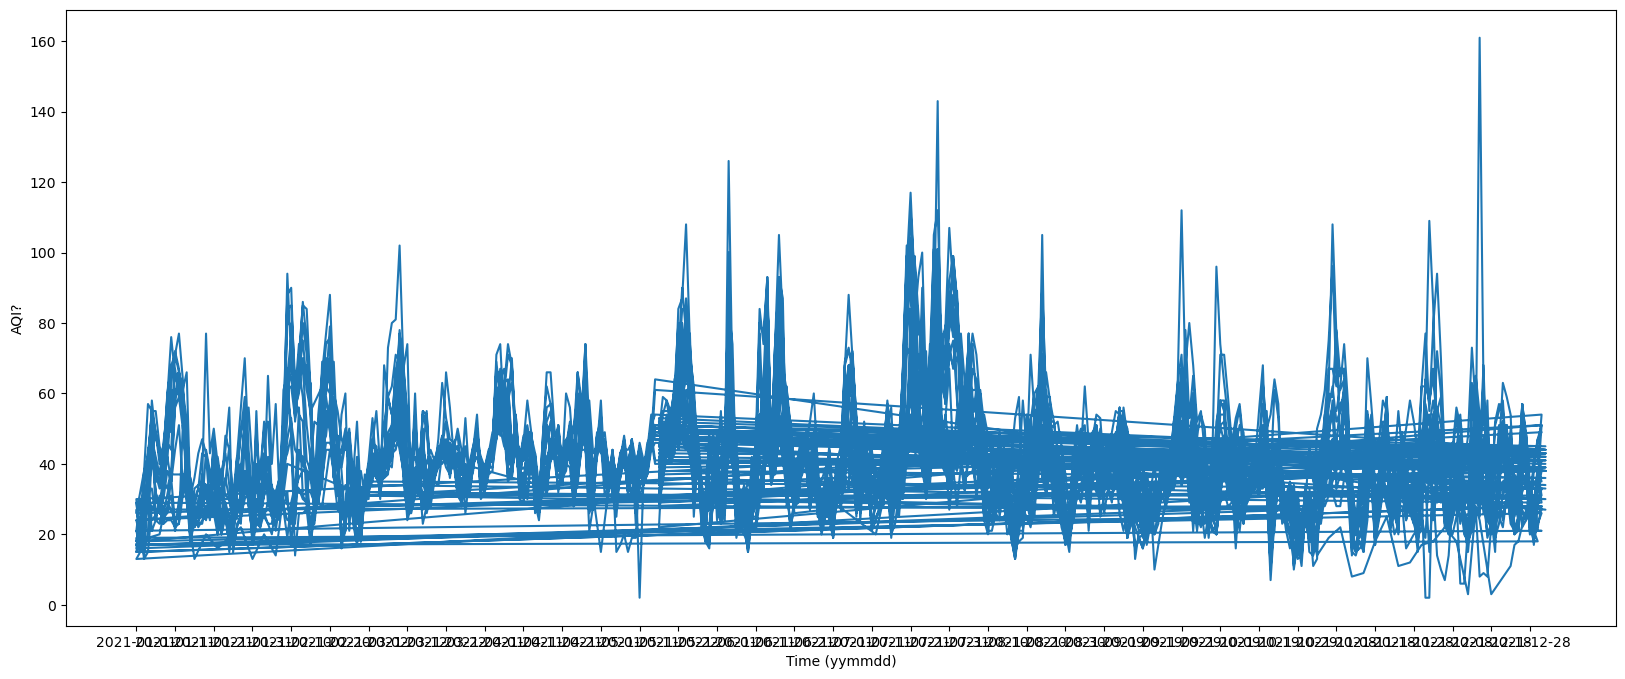

In [37]:
fig, ax = plt.subplots()
ax.plot(airq_kt["Date"], airq_kt["AQI"], label = airq_kt["county Name"])
ax.set_xlabel("Time (yymmdd)")
ax.set_xticks(ax.get_xticks()[::10])
ax.set_ylabel("AQI?")
plt.gcf().set_size_inches(20,8)
# plt.axvline(x="2016-12-01", linestyle = '--', color = 'black')
# plt.text(58,0.35,'New SA',rotation=90)
plt.show()


[Text(0.5, 1.0, 'Well, this is horrifying!')]

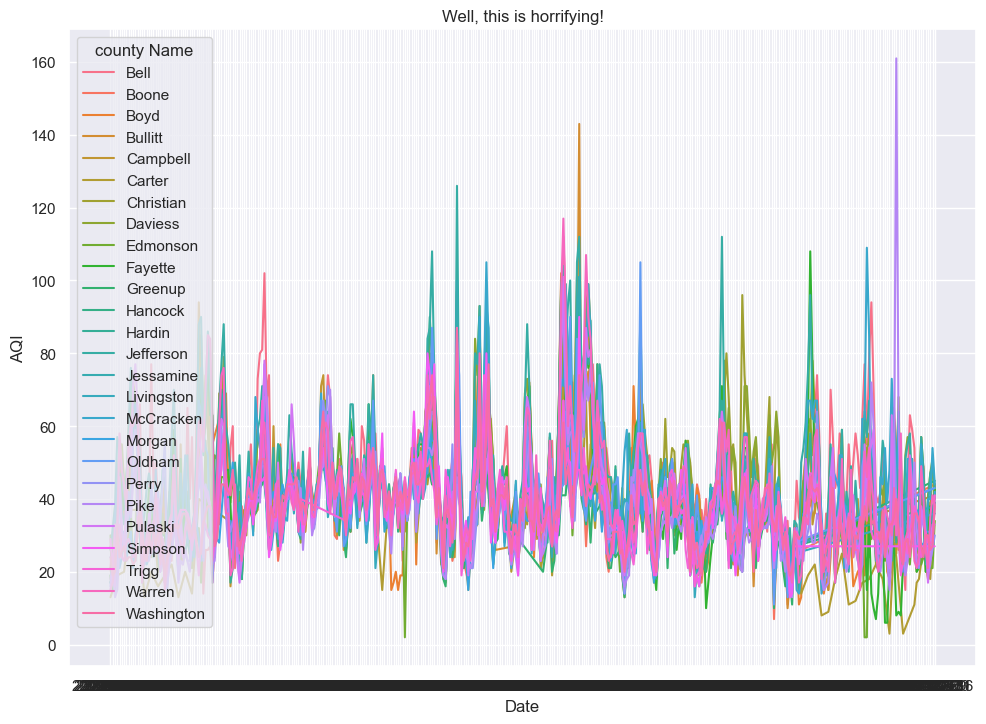

In [44]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = airq_kt, x = "Date", y = "AQI", hue= "county Name" ).set(title='Well, this is horrifying!')